# Historical Tonnage List API Examples

## Setup
Install the Signal Ocean SDK:
```
pip install signal-ocean
```
Set your subscription key acquired here: https://apis.signalocean.com/profile

In [1]:
pip install signal-ocean

In [2]:
signal_ocean_api_key = '' #replace with your subscription key

## Retrieving a historical tonnage list
First, we need to determine the parameters of the **historical tonnage list** (**HTL**). In order to fetch an HTL, we will need to specify:
- a loading port,
- a vessel class,
- a time frame.

Ports and vessel classes can be retrieved through their corresponding APIs via the `PortAPI` and `VesselClassAPI` classes:

In [3]:
from signal_ocean import PortAPI, VesselClassAPI, Connection

connection = Connection(signal_ocean_api_key)

port_api = PortAPI(connection)
vessel_class_api = VesselClassAPI(connection)

vessel_class_api.get_vessel_classes()

(VesselClass(id=60, name='VLGCLpg'),
 VesselClass(id=61, name='MidsizeLpg'),
 VesselClass(id=62, name='HandyLpg'),
 VesselClass(id=63, name='SmallLpg'),
 VesselClass(id=69, name='VLOC'),
 VesselClass(id=70, name='Capesize'),
 VesselClass(id=72, name='PostPanamaxDry'),
 VesselClass(id=74, name='PanamaxDry'),
 VesselClass(id=75, name='Supramax'),
 VesselClass(id=76, name='Handymax'),
 VesselClass(id=77, name='Handysize'),
 VesselClass(id=78, name='ULCV'),
 VesselClass(id=79, name='NewPanamaxContainer'),
 VesselClass(id=80, name='PostPanamaxContainer'),
 VesselClass(id=81, name='PanamaxContainer'),
 VesselClass(id=82, name='FeedermaxContainer'),
 VesselClass(id=83, name='FeederContainer'),
 VesselClass(id=84, name='VLCC'),
 VesselClass(id=85, name='Suezmax'),
 VesselClass(id=86, name='Aframax'),
 VesselClass(id=87, name='PanamaxTanker'),
 VesselClass(id=88, name='MR2'),
 VesselClass(id=89, name='MR1'),
 VesselClass(id=90, name='Small'),
 VesselClass(id=91, name='LNGLng'),
 VesselClass(id=

Ports can be looked up by their name using the `PortFilter`:

In [4]:
from signal_ocean import PortFilter

port_api.get_ports(PortFilter(name_like='rot'))

(Port(id=3689, name='Rotterdam'),
 Port(id=6625, name='Rota'),
 Port(id=8920, name='Crotone'),
 Port(id=15617, name='Rarotonga'))

And so can vessel classes with the use of the `VesselClassFilter`:

In [5]:
from signal_ocean import VesselClassFilter

vessel_class_api.get_vessel_classes(VesselClassFilter(name_like='MAX'))

(VesselClass(id=72, name='PostPanamaxDry'),
 VesselClass(id=74, name='PanamaxDry'),
 VesselClass(id=75, name='Supramax'),
 VesselClass(id=76, name='Handymax'),
 VesselClass(id=79, name='NewPanamaxContainer'),
 VesselClass(id=80, name='PostPanamaxContainer'),
 VesselClass(id=81, name='PanamaxContainer'),
 VesselClass(id=82, name='FeedermaxContainer'),
 VesselClass(id=85, name='Suezmax'),
 VesselClass(id=86, name='Aframax'),
 VesselClass(id=87, name='PanamaxTanker'))

Note that the search is case-insensitive and does not require specifying exact names.

We will look for Aframax vessels in Ceyhan, 6 days forward, for the last 90 days:

In [6]:
from datetime import date, timedelta,time,datetime

vessel_class = vessel_class_api.get_vessel_classes(VesselClassFilter(name_like='aframax'))[0]
port = port_api.get_ports(PortFilter(name_like='ceyhan'))[0]
days_forward = 6
today = datetime.utcnow().date()
start_date = today - timedelta(days=5)

With the parameters above, we can now call the API:

In [7]:
from signal_ocean.historical_tonnage_list import HistoricalTonnageListAPI

htl_api = HistoricalTonnageListAPI(connection)

htl = htl_api.get_historical_tonnage_list(
    port,
    vessel_class,
    days_forward,
    start_date,
    end_date=today
)

The resulting historical tonnage list is a Python object that contains a collection of tonnage lists, each of which has a timestamp and a collection of vessel data. The tonnage lists are ordered by date in descending order:

In [8]:
todays_tl = htl[0]
print('Date:', todays_tl.date)
print('Vessel count:', len(todays_tl.vessels))
print('Example vessel:', todays_tl.vessels[0])

Date: 2021-03-22 00:00:00+00:00
Vessel count: 59
Example vessel: Vessel(imo=9215050, name='Alboran I', vessel_class='Aframax', ice_class=None, year_built=2001, deadweight=109326, length_overall=244.6, breadth_extreme=42, market_deployment='Spot', push_type='Not Pushed', open_port='Hong Kong', open_date=datetime.datetime(2019, 6, 20, 3, 42, 39, 940000, tzinfo=datetime.timezone.utc), operational_status='Laden', commercial_operator='Monte Nero Maritime', commercial_status='Available', eta=datetime.datetime(2019, 7, 15, 1, 0, tzinfo=datetime.timezone.utc), latest_ais=datetime.datetime(2019, 6, 13, 11, 34, 48, tzinfo=datetime.timezone.utc), subclass='Dirty', willing_to_switch_subclass=False, open_prediction_accuracy='Port', open_areas=(Area(name='South China', location_taxonomy='Narrow Area'), Area(name='China / Taiwan', location_taxonomy='Wide Area'), Area(name='China', location_taxonomy='Country')), availability_port_type='Source', availability_date_type='Prediction')


The result can also be converted into a Pandas data frame:

In [9]:
data_frame = htl.to_data_frame()
data_frame

name vessel_class ice_class  \
date                      imo                                                
2021-03-22 00:00:00+00:00 9215050         Alboran I      Aframax       NaN   
                          9038878               Eos      Aframax       NaN   
                          9258894   Golden Splendor      Aframax       NaN   
                          9138604   Barakuda Natuna      Aframax       NaN   
                          9226970           Yoselin      Aframax       NaN   
...                                             ...          ...       ...   
2021-03-17 00:00:00+00:00 9388807     Ocean Voyager      Aframax       NaN   
                          9422536  Dubai Attraction      Aframax       NaN   
                          9368235      Ocean Taipan      Aframax       NaN   
                          9843209          Seafaith      Aframax       NaN   
                          9458016        Delta Star      Aframax       NaN   

                                   year_built  deadweight  length_overall  \
date                      imo                                               
2021-03-22 00:00:00+00:00 9215050        2001      109326          244.60   
                          9038878        1993       99440          243.97   
                          9258894        2004      114809          251.60   
                          9138604        1998      109277          244.60   
                          9226970        2001       98893          248.00   
...                                       ...         ...             ...   
2021-03-17 00:00:00+00:00 9388807        2009      108929          245.07   
                          9422536        2011      115459          250.00   
                          9368235        2008      108936          245.07   
                          9843209        2020      111963          237.00   
                          9458016        2013      115618          248.97   

                                   breadth_extreme subclass  \
date                      imo                                 
2021-03-22 00:00:00+00:00 9215050               42    Dirty   
                          9038878               46    Dirty   
                          9258894               44    Dirty   
                          9138604               42    Clean   
                          9226970               43    Dirty   
...                                            ...      ...   
2021-03-17 00:00:00+00:00 9388807               42    Clean   
                          9422536               44    Dirty   
                          9368235               42    Clean   
                          9843209               44    Dirty   
                          9458016               44    Dirty   

                                  market_deployment_point_in_time  \
date                      imo                                       
2021-03-22 00:00:00+00:00 9215050                            Spot   
                          9038878                         Program   
                          9258894                        Contract   
                          9138604                            Spot   
                          9226970                        Contract   
...                                                           ...   
2021-03-17 00:00:00+00:00 9388807                            Spot   
                          9422536                            Spot   
                          9368235                            Spot   
                          9843209                         Program   
                          9458016                            Spot   

                                  push_type_point_in_time  ...  \
date                      imo                              ...   
2021-03-22 00:00:00+00:00 9215050              Not Pushed  ...   
                          9038878              Not Pushed  ...   
                          9258894              N

## Example 1 - Plotting a supply trend
The data frame format makes it very easy to generate a supply trend plot.

We'll generate a supply trend from the beginning of the year, but we'll also filter the vessel list by looking for vessels that:
- are pushed,
- have a market deployment type of "Relet" or "Spot",
- their commercial status is available, cancelled or failed,
- are crude oil tankers (their vessel subclass is "Dirty"),
- their AIS information is no older than 5 days.

Filtering can be achieved by creating an instance of a `VesselFilter` and passing it to the `get_historical_tonnage_list` method. A `VesselFilter` meeting the above criteria will look as follows:

In [10]:
from signal_ocean.historical_tonnage_list import VesselFilter, PushType, MarketDeployment, CommercialStatus, VesselSubclass

vessel_filter = VesselFilter(
    push_types=[PushType.PUSHED],
    market_deployments=[MarketDeployment.RELET, MarketDeployment.SPOT],
    commercial_statuses=[CommercialStatus.AVAILABLE, CommercialStatus.CANCELLED, CommercialStatus.FAILED],
    vessel_subclass=VesselSubclass.DIRTY,
    latest_ais_since=5
)

Note the usage of the `PushType`, `MarketDeployment`, `CommercialStatus`, and `VesselSubclass`. These are enum-like classes that contain constants for all the possible values for a given `VesselFilter` parameter. To list the available values for any of the classes, just invoke `list()` on the class:

In [11]:
list(CommercialStatus)

['On Subs', 'Failed', 'Cancelled', 'Available', 'Poss Fixed']

You can use these values directly or use a corresponding class member:

In [12]:
CommercialStatus.ON_SUBS == 'On Subs'

True

Let's get the HTL for our filter:

In [13]:
beginning_of_year = date(today.year, 1, 1)

htl_for_supply_trend = htl_api.get_historical_tonnage_list(
    port,
    vessel_class,
    days_forward,
    start_date,
    end_date=today,
    vessel_filter=vessel_filter,
    time=time(hour=6)
)

supply_trend_data_frame = htl_for_supply_trend.to_data_frame()

supply_trend_data_frame

89083                    Cardiff Marine   
                          9389071                    Cardiff Marine   
                          9239927               Bihar International   
                          9458016                     Delta Tankers   

                                  commercial_status_point_in_time  \
date                      imo                                       
2021-03-22 06:00:00+00:00 9458016                       Available   
                          9282479                       Available   
                          9389100                       Available   
                          9416551                       Available   
                          9247390                       Available   
                          9299599                       Available   
                          9259707                       Available   
                          9395329                       Available   
                          9296195                       Available   
2021-03-21 06:00:00+00:00 9389083                       Available   
                          9458016                       Available   
                          9416551                       Available   
                          9247390                       Available   
2021-03-20 06:00:00+00:00 9389083                       Available   
                          9416551                       Available   
                          9458016                       Available   
2021-03-19 06:00:00+00:00 9333785                       Available   
                          9458016                       Available   
                          9388364                       Available   
                          9239927                       Available   
2021-03-18 06:00:00+00:00 9296195                       Available   
                          9239927                       Available   
                          9767340                       Available   
2021-03-17 06:00:00+00:00 9308833                       Available   
                          9416551                       Available   
                          9296195                       Available   
                          9389083                       Available   
                          9389071                       Available   
                          9239927                       Available   
                          9458016                       Available   

                                          eta_point_in_time  \
date                      imo                                 
2021-03-22 06:00:00+00:00 9458016 2021-03-23 23:00:00+00:00   
                          9282479 2021-03-24 18:00:00+00:00   
                          9389100 2021-03-26 15:00:00+00:00   
                          9416551 2021-03-26 17:00:00+00:00   
                          9247390 2021-03-27 08:00:00+00:00   
                          9299599 2021-03-28 02:00:00+00:00   
                          9259707 2021-03-28 07:00:00+00:00   
                          9395329 2021-03-28 07:00:00+00:00   
                          9296195 2021-03-28 16:00:00+00:00   
2021-03-21 06:00:00+00:00 9389083 2021-03-22 13:00:00+00:00   
                          9458016 2021-03-23 23:00:00+00:00   
                          9416551 2021-03-25 17:00:00+00:00   
                          9247390 2021-03-27 06:00:00+00:00   
2021-03-20 06:00:00+00:00 9389083 2021-03-22 00:00:00+00:00   
                          9416551 2021-03-22 13:00:00+00:00   
                          9458016 2021-03-23 23:00:00+00:00   
2021-03-19 06:00:00+00:00 9333785 2021-03-23 20:00:00+00:00   
                          9458016 2021-03-24 23:00:00+00:00   
                          9388364 2021-03-25 18:00:00+00:00   
                          9239927 2021-03-25 21:00:00+00:00   
2021-03-18 06:00:00+00:00 9296195 2021-03-21 19:00:00+00:00   
                          9239927 2021-03-23 07:00:00+00:00   
                      

Now, we can generate the plot:

<AxesSubplot:xlabel='date', ylabel='Vessel count'>

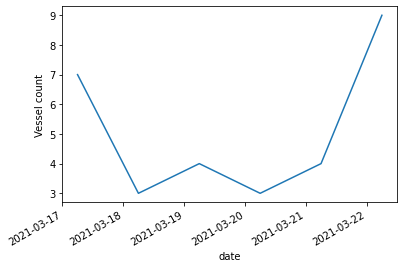

In [14]:
from signal_ocean.historical_tonnage_list import IndexLevel

supply_trend = supply_trend_data_frame.groupby(IndexLevel.DATE, sort=True).size()
plot = supply_trend.plot()
plot.set_ylabel('Vessel count')

plot

## Example 2 - Generating an Excel sheet
The data frame can be easily saved as an Excel file by using Pandas's built-in `to_excel()` function.

Before we do that, we need to remove all the time zone information from all the timestamps in the data frame. This is because Excel does not support storing time zone information along with timestamps. However, Signal Ocean's SDK always provides time zone information to make all timestamp-based computation unambiguous.

In [15]:
from signal_ocean.historical_tonnage_list import Column

without_time_zones = (
    supply_trend_data_frame
        .reset_index()
        .astype({ IndexLevel.DATE: 'datetime64[ns]', Column.OPEN_DATE: 'datetime64[ns]', Column.ETA: 'datetime64[ns]', Column.LATEST_AIS: 'datetime64[ns]'})
        .set_index([IndexLevel.DATE, IndexLevel.IMO])
 )

Now, we can generate the Excel file:

In [16]:
without_time_zones.to_excel('htl.xlsx')